<a href="https://colab.research.google.com/github/atharv1707/MachineLearningProjects/blob/main/image_sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Dependencies


In [2]:
import tensorflow as tf
import os


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
  tf.config.experimental.set_memory_growth(gpu, True)

Remove Dodgy Images


In [4]:
import cv2
import imghdr
import matplotlib.pyplot as plt


In [5]:
data_dir = '/content/drive/MyDrive/Projects/Image Sentiment Classifier/Data/Data'


In [ ]:
os.listdir(os.path.join(data_dir, 'Happy People Data'))

In [7]:
image_ext = ['jpeg', 'jpg', 'png']


In [8]:
for image_class in os.listdir(data_dir):
  print(image_class)

Sad People Data
Happy People Data


In [9]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)

    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_ext:
        os.remove(image_path)
    except Exception as e:
      print("EXCEPTION DUDE")



#Load Data


In [10]:
import numpy as np


In [11]:
data  = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 138 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()



In [14]:
len(batch) # 2 parts- images and labels


2

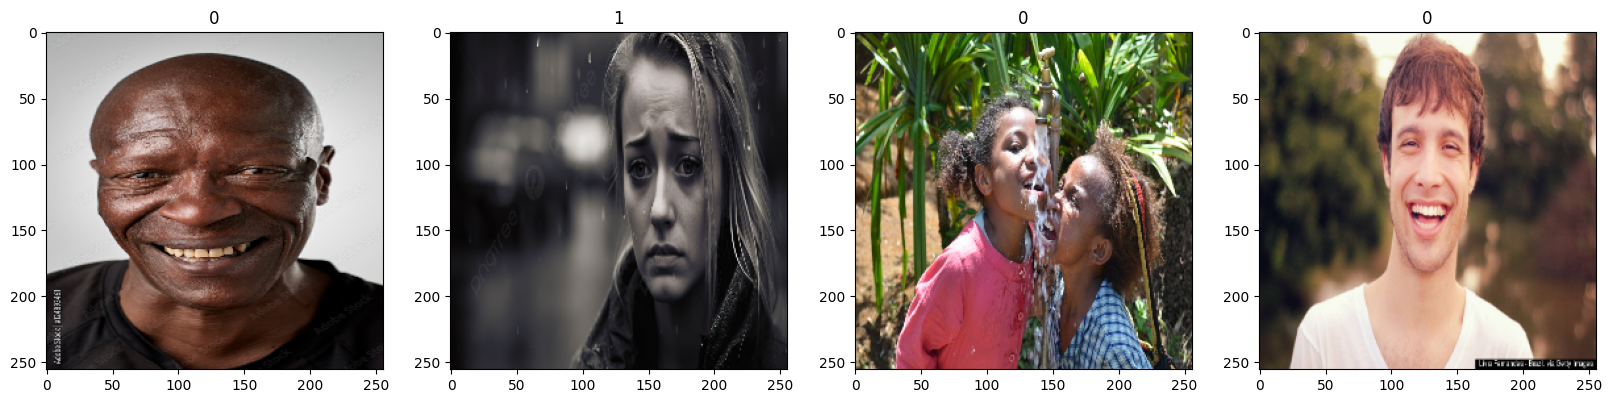

In [15]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

#PreProc


In [16]:
#let's normalize stuff here

data = data.map(lambda x, y : (x/255, y))
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
scaled_it = data.as_numpy_iterator()


In [18]:
batch  = scaled_it.next()


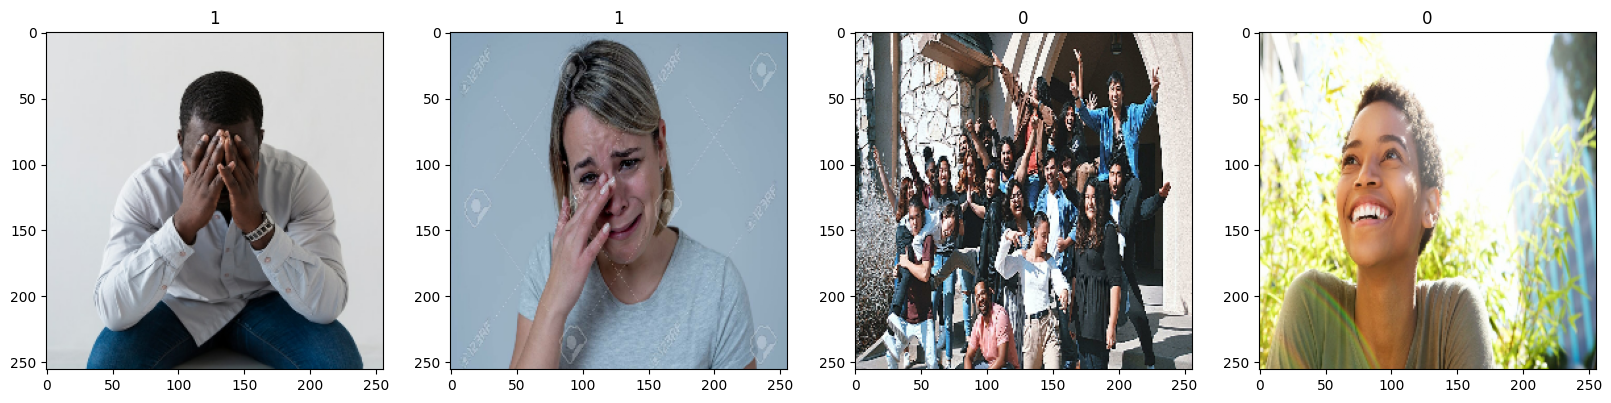

In [19]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

splitting data


In [20]:
len(data)

5

In [21]:
train_size = int(len(data)*0.7)
val_size = int(len(data)* 0.2) + 1
test_size = int(len(data)*0.1) + 1


In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


#Deep Learning Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout



In [27]:
model =  Sequential()



In [28]:
model.add(Conv2D(16, (3,3), 1, activation ='relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation ='relu' ))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))





In [30]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [33]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)


In [35]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 13s 4s/step - loss: 1.3110 - accuracy: 0.5104 - val_loss: 0.9132 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 11s 3s/step - loss: 0.8048 - accuracy: 0.5104 - val_loss: 0.6421 - val_accuracy: 0.5952
Epoch 3/20
3/3 [==============================] - 9s 3s/step - loss: 0.6315 - accuracy: 0.5729 - val_loss: 0.5679 - val_accuracy: 0.6429
Epoch 4/20
3/3 [==============================] - 11s 4s/step - loss: 0.6022 - accuracy: 0.5729 - val_loss: 0.5663 - val_accuracy: 0.6667
Epoch 5/20
3/3 [==============================] - 9s 3s/step - loss: 0.5557 - accuracy: 0.7917 - val_loss: 0.4878 - val_accuracy: 0.7619
Epoch 6/20
3/3 [==============================] - 11s 3s/step - loss: 0.4646 - accuracy: 0.7500 - val_loss: 0.4930 - val_accuracy: 0.6905
Epoch 7/20
3/3 [==============================] - 9s 3s/step - loss: 0.4811 - accuracy: 0.8229 - val_loss: 0.3753 - val_accuracy: 0.9524
Epoch 8/20
3/3 [=====================

#Test

In [38]:
import cv2


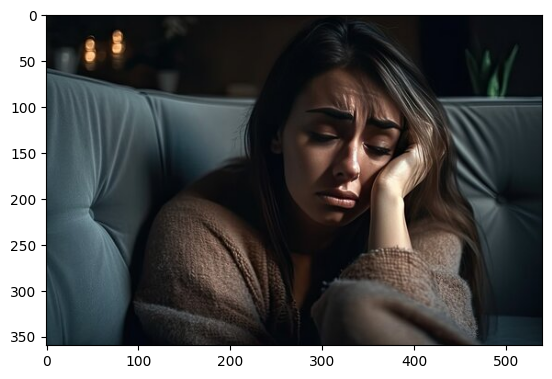

In [71]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/sad test.jpg')

if img is None:
  print('Image file does not exist or is corrupted.')
else:
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

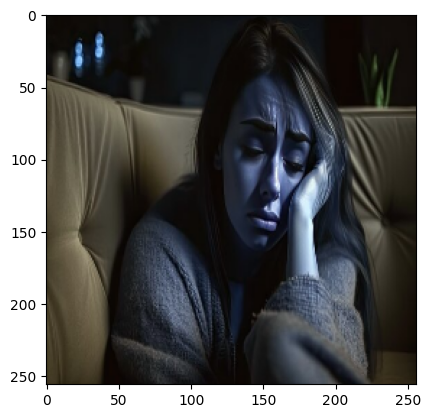

In [72]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
np.expand_dims(resize,0)

array([[[[16.645142 , 15.645142 , 11.645142 ],
         [17.       , 16.       , 12.       ],
         [15.4071045, 14.4071045, 10.4071045],
         ...,
         [16.       , 11.       ,  8.       ],
         [16.       , 11.       ,  8.       ],
         [16.       , 11.       ,  8.       ]],

        [[17.338013 , 16.338013 , 12.338013 ],
         [17.204712 , 16.204712 , 12.204712 ],
         [15.2265625, 14.2265625, 10.2265625],
         ...,
         [16.       , 11.       ,  8.       ],
         [16.       , 11.       ,  8.       ],
         [16.       , 11.       ,  8.       ]],

        [[18.015625 , 17.015625 , 13.015625 ],
         [17.335938 , 16.335938 , 12.3359375],
         [15.2265625, 14.2265625, 10.2265625],
         ...,
         [16.       , 11.       ,  8.       ],
         [16.       , 11.       ,  8.       ],
         [16.       , 11.       ,  8.       ]],

        ...,

        [[61.       , 52.       , 32.       ],
         [62.664062 , 53.664062 , 33.664062 ]

In [74]:
yhat = model.predict(np.expand_dims(resize/255,0))

if yhat > 0.5:
  print("It's a sad mf")
else:
  print("It's a happy mf")

1/1 [==============================] - 0s 43ms/step
It's a sad mf


##Save the Model


In [69]:
from tensorflow.keras.models import load_model

In [70]:
model.save(os.path.join('Models', 'imageSentiment.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
